## Linear Regression


[Refer This](https://realpython.com/linear-regression-in-python/) : Theory for Linear Regression. 

When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, you assume a linear relationship between 𝑦 and 𝐱:

𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. 

This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random error.

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])


In [15]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [16]:
y

array([ 5, 20, 14, 32, 22, 38])

In [17]:
model = LinearRegression().fit(x, y)

In [18]:
r_sq = model.score(x, y)
print("Coefficient of Determination", r_sq)

Coefficient of Determination 0.7158756137479542


In [19]:
# b0
print("intercept:", model.intercept_)
# b1
print("slope:", model.coef_)

intercept: 5.633333333333329
slope: [0.54]


The code above illustrates how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

In [20]:
y_pred = model.predict(x)
print("Predicted response:", y_pred, sep='\n')

# Similar to this
# y_pred = model.intercept_ + model.coef_ * x
# print('predicted response:', y_pred, sep='\n')
# predicted response:
# [[ 8.33333333]
#  [13.73333333]
#  [19.13333333]
#  [24.53333333]
#  [29.93333333]
#  [35.33333333]]

Predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


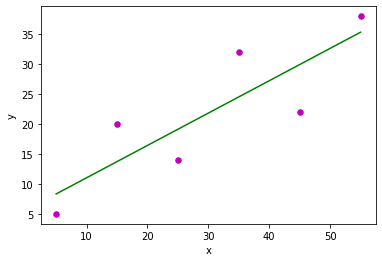

In [21]:
plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.plot(x, y_pred, color = "g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/Aniket29-shiv/datasets/main/HousingData.csv")

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Attribute Information (in order):

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


MEDV: is the cost * 1000

In [24]:
df.shape

(506, 14)

In [25]:
df.isnull().sum()
# for now we only need RM and MEDV

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [26]:
# x1 = df['RM']
# y1 = df['MEDV']


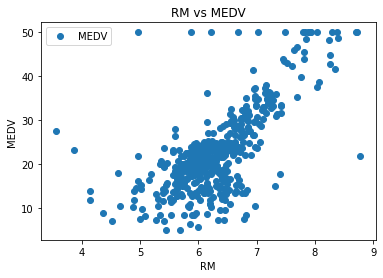

In [27]:
df.plot(x='RM', y='MEDV', style='o')

plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [28]:
x1 = df['RM'].values.reshape(-1,1)  # X stands for Features
y1 = df['MEDV'].values  #y stands for labels

## Splitting Data

Now the data is splits into training data and testing data.We'll do this by using Scikit-Learn's built-in "train_test_split()" method.


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0) 

## Training the data with Linear Regression Algorithm

In [30]:
linear = LinearRegression().fit(X_train, y_train)

In [31]:
line = linear.coef_*x1+linear.intercept_


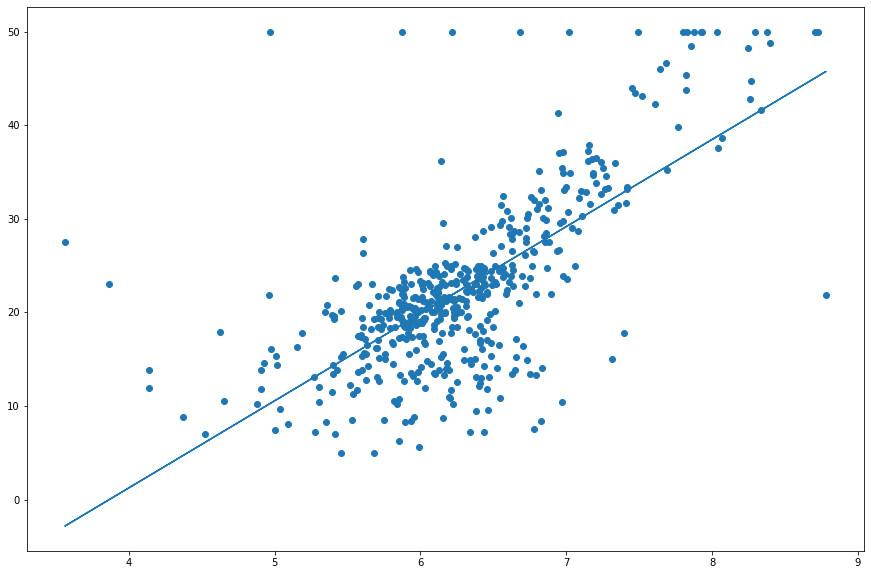

In [32]:
# Plotting for the test data
plt.figure(figsize=(15,10)) 
plt.scatter(x1, y1)
plt.plot(x1, line)
plt.show()

## Correlation Matrix

In [33]:
import seaborn as sn

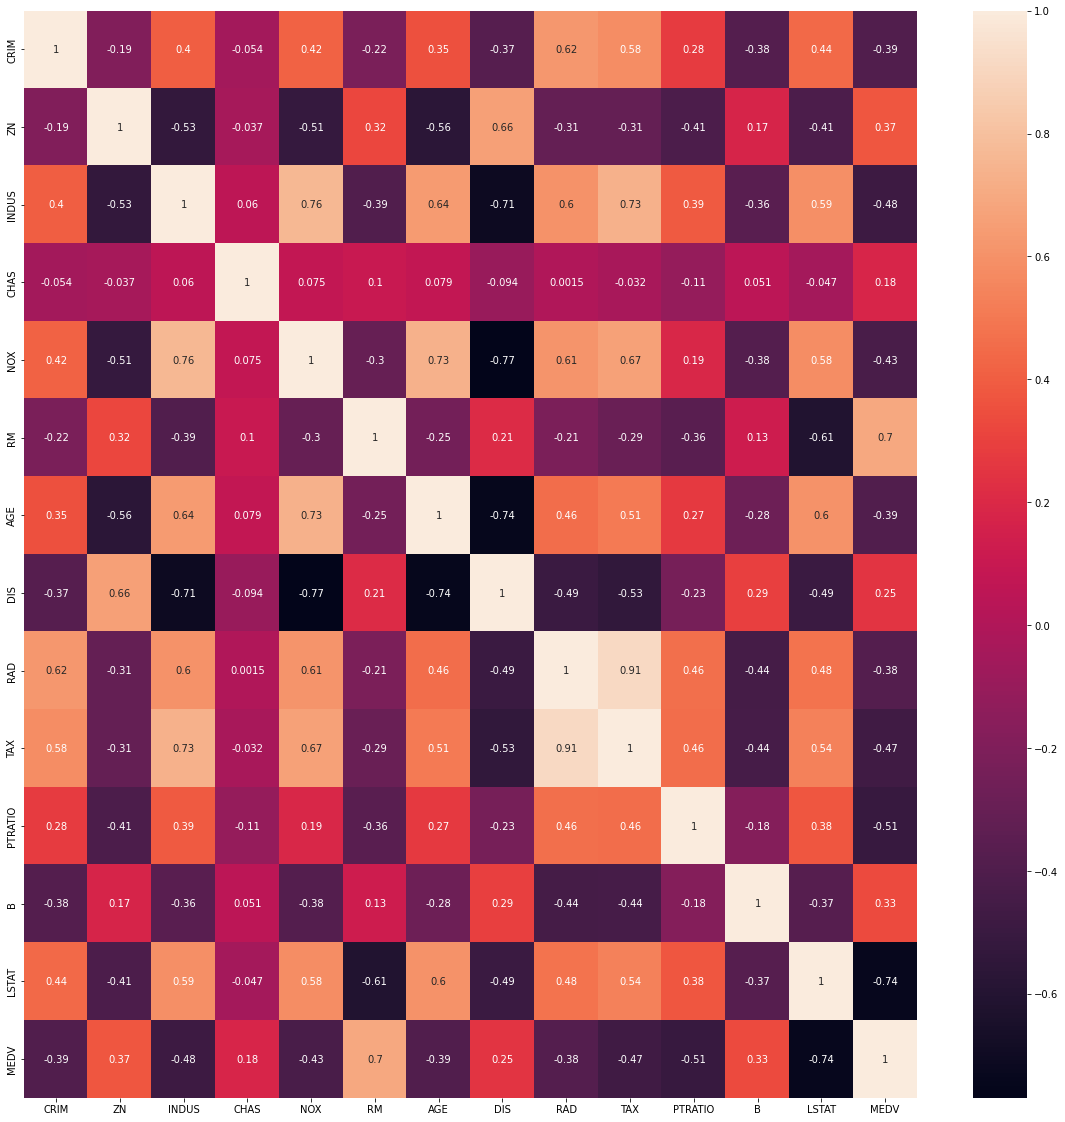

In [34]:
corrMatrix = df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)

plt.show()